In [223]:
import numpy as np
from numpy import sin, cos, pi

# Reconstructing a single-field time-series with random phase

## coherent approach: respecting the nyquist frequency

In [273]:
fs = 1
DT = 60
ts = np.arange(0, DT, 1/fs)

In [274]:
Nf = int(fs/(2*f_min)-1) 
An = np.random.rand(Nf-1)*2. - 1.
Bn = np.random.rand(Nf-1)*2. - 1.

f_min = 1/DT
freqs = np.arange(f_min, Nf*f_min, f_min)

In [275]:
h_t = np.sum( An * sin(2*pi * np.outer(ts, freqs)) + Bn * cos(2*pi * np.outer(ts, freqs)), axis = -1 )

In [276]:
print(h_t.shape)

(60,)


In [277]:
print(fs/2)

0.5


In [278]:
print(Nf*f_min)

0.48333333333333334


In [279]:
d_t = h_t 

In [280]:
An_hat = 2./len(ts) * np.sum( d_t * sin(2*pi * np.outer(freqs, ts)), axis = -1) 
Bn_hat = 2./len(ts) * np.sum( d_t * cos(2*pi * np.outer(freqs, ts)), axis = -1) 

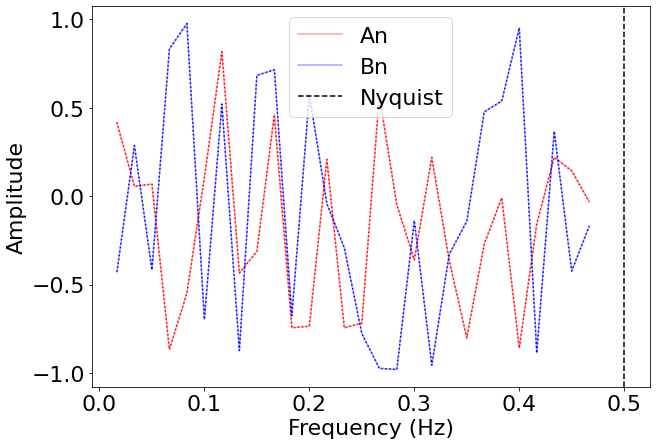

In [281]:
import matplotlib as mlb
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,7)
mlb.rcParams.update({'font.size': 22})

plt.plot(freqs, An, color ='r', alpha = 0.35, label = 'An')
plt.plot(freqs, An_hat, ':', color ='r')
plt.plot(freqs, Bn, color ='b', alpha = 0.35, label = 'Bn')
plt.plot(freqs, Bn_hat, ':', color = 'b')
plt.axvline(x=fs/2., ymax=2, linestyle = '--', color = 'black', label = 'Nyquist')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

## coherent approach: NOT respecting the nyquist frequency

In [282]:
fs = 1
DT = 60
ts = np.arange(0, DT, 1/fs)

In [283]:
Nf = 40 #int(fs/(2*f_min)-1)
An = np.random.rand(Nf-1)*2. - 1.
Bn = np.random.rand(Nf-1)*2. - 1.

f_min = 1/DT
freqs = np.arange(f_min, Nf*f_min, f_min)

In [284]:
h_t = np.sum( An * sin(2*pi * np.outer(ts, freqs)) + Bn * cos(2*pi * np.outer(ts, freqs)), axis = -1 )

In [285]:
print(h_t.shape)

(60,)


In [286]:
print(fs/2)

0.5


In [287]:
print(Nf*f_min)

0.6666666666666666


In [288]:
d_t = h_t 

In [289]:
An_hat = 2./len(ts) * np.sum( d_t * sin(2*pi * np.outer(freqs, ts)), axis = -1) 
Bn_hat = 2./len(ts) * np.sum( d_t * cos(2*pi * np.outer(freqs, ts)), axis = -1) 

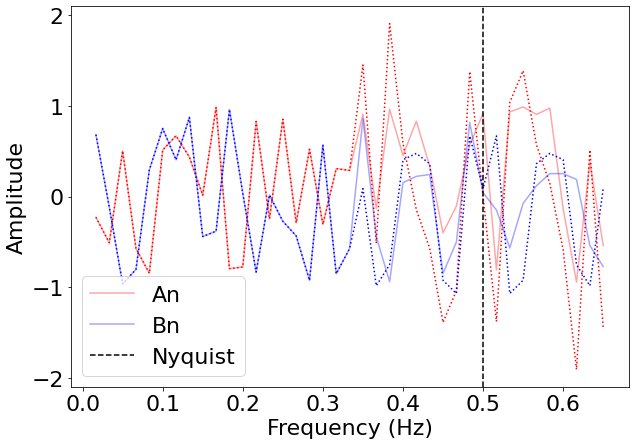

In [290]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,7)

plt.plot(freqs, An, color ='r', alpha = 0.35, label = 'An')
plt.plot(freqs, An_hat, ':', color ='r')
plt.plot(freqs, Bn, color ='b', alpha = 0.35, label = 'Bn')
plt.plot(freqs, Bn_hat, ':', color = 'b')
plt.axvline(x=fs/2., ymax=2, linestyle = '--', color = 'black', label = 'Nyquist')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

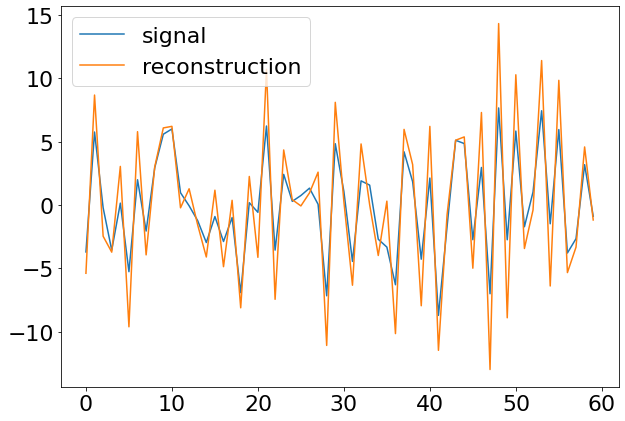

In [293]:
h_t_hat = np.sum( An_hat * sin(2*pi * np.outer(ts, freqs)) + Bn_hat * cos(2*pi * np.outer(ts, freqs)), axis = -1 )

plt.plot(h_t, label = 'signal')
plt.plot(h_t_hat, label = 'reconstruction')
plt.legend()
plt.show()

## Incoherent approach: Intensity estimation

In [294]:
Nf = int(fs/(2*f_min)) 
An = np.random.rand(Nf)*2. - 1.
Bn = np.random.rand(Nf)*2. - 1.

f_min = 1/DT
freqs = np.arange(0, Nf*f_min, f_min)

In [295]:
h_t = np.sum( An * sin(2*pi * np.outer(ts, freqs)) + Bn * cos(2*pi * np.outer(ts, freqs)), axis = -1 )

#h_f = np.fft.rfft(h_t, norm = 'ortho')
h_f = np.sum( h_t * ( cos(2*pi * np.outer(freqs, ts)) - 1.j*sin(2*pi * np.outer(freqs, ts))), axis = -1) 
#freqs = np.fft.rfftfreq(len(h_t), 1./fs)

In [296]:
C_hat_11 = 2/len(h_t)**2 * np.real( h_f *np.conj(h_f) )

C_hat_11[0] *= 0.5

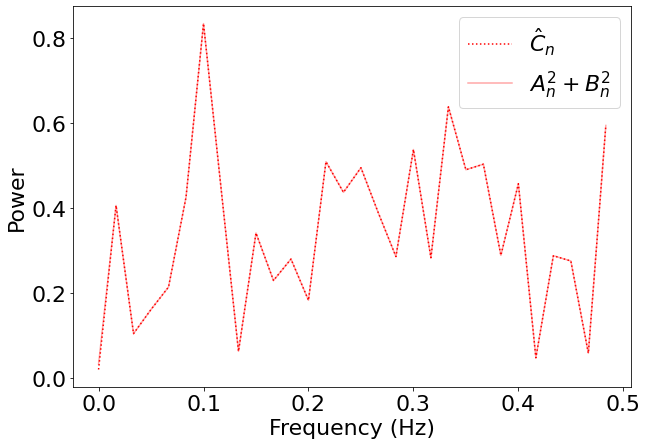

In [297]:
plt.plot(freqs, C_hat_11, label = r'$\hat{C}_n$', color = 'red', linestyle = ':') #/len(h_t))
plt.plot(freqs, (An**2 + Bn**2)/2., label = r'$A_n^2 + B_n^2$', color = 'red', alpha = 0.35)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.legend()
plt.show()

## Incoherent approach: Intensity estimation NOT respecting nyquist frequency

In [298]:
Nf = 40 # int(fs/(2*f_min)) 
An = np.random.rand(Nf)*2. - 1.
Bn = np.random.rand(Nf)*2. - 1.
f_min = 1/DT
freqs = np.arange(0, Nf*f_min, f_min)

In [299]:
h_t = np.sum( An * sin(2*pi * np.outer(ts, freqs)) + Bn * cos(2*pi * np.outer(ts, freqs)), axis = -1 )

h_f = np.sum( h_t * ( cos(2*pi * np.outer(freqs, ts)) - 1.j*sin(2*pi * np.outer(freqs, ts))), axis = -1) 
#freqs = np.fft.rfftfreq(len(h_t), 1/fs)

In [303]:
C_hat_11 = 2/len(h_t)**2 * np.real( h_f *np.conj(h_f) )

C_hat_11[0] *= 0.5
print(len(h_t), len(C_hat_11))

60 40


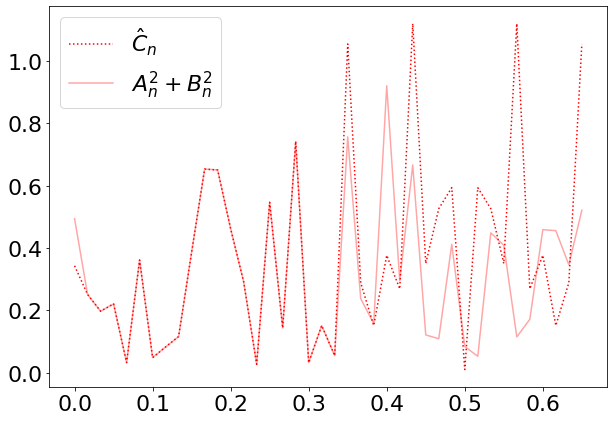

In [304]:
plt.plot(freqs, C_hat_11, label = r'$\hat{C}_n$', color = 'red', linestyle = ':') #/len(h_t))
plt.plot(freqs, (An**2 + Bn**2)/2., label = r'$A_n^2 + B_n^2$', color = 'red', alpha = 0.35)
plt.legend()
plt.show()

In [272]:
print(np.mean(C_hat_11), np.mean((An**2 + Bn**2)/2.))


# -> just like an angular power spectrum

0.5980568585696788 0.3618680760326891


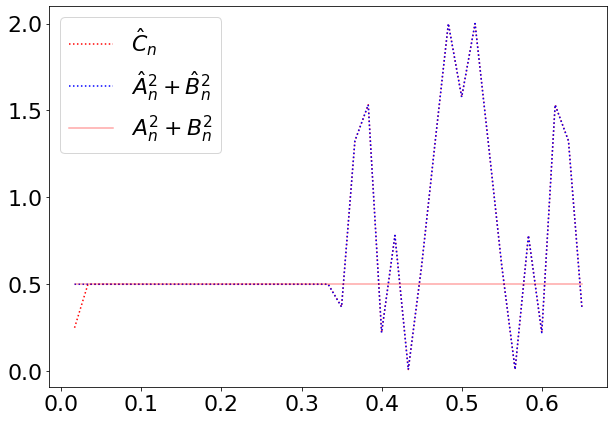

In [308]:
fs = 1
DT = 60
ts = np.arange(0, DT, 1/fs)
Nf = 40 #int(fs/(2*f_min)-1) 

theta = np.random.rand(Nf-1)*pi*2.

An = cos(theta) #np.random.rand(Nf-1)*2. - 1.
Bn = sin(theta) #np.random.rand(Nf-1)*2. - 1.

f_min = 1/DT
freqs = np.arange(f_min, Nf*f_min, f_min)

h_t = np.sum( An * sin(2*pi * np.outer(ts, freqs)) + Bn * cos(2*pi * np.outer(ts, freqs)), axis = -1 )

h_f = np.sum( h_t * ( cos(2*pi * np.outer(freqs, ts)) - 1.j*sin(2*pi * np.outer(freqs, ts))), axis = -1) 

An_hat = 2./len(ts) * np.sum( h_t * sin(2*pi * np.outer(freqs, ts)), axis = -1) 
Bn_hat = 2./len(ts) * np.sum( h_t * cos(2*pi * np.outer(freqs, ts)), axis = -1) 

C_hat_11 = 2/len(h_t)**2 * np.real( h_f *np.conj(h_f) )

plt.plot(freqs, C_hat_11, label = r'$\hat{C}_n$', color = 'red', linestyle = ':') #/len(h_t))
plt.plot(freqs, (An_hat**2 + Bn_hat**2)/2., label = r'$\hat{A}_n^2 + \hat{B}_n^2$', color = 'blue', linestyle = ':')
plt.plot(freqs, (An**2 + Bn**2)/2., label = r'$A_n^2 + B_n^2$', color = 'red', alpha = 0.35)
plt.legend()
plt.show()

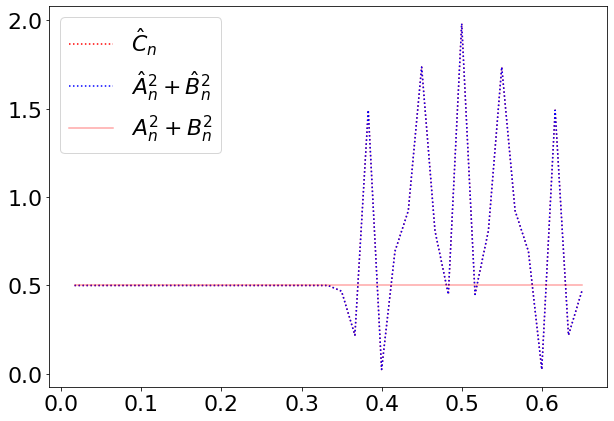

In [312]:
fs = 1
DT = 60
ts = np.arange(0, DT, 1/fs)
Nf = 40 #int(fs/(2*f_min)-1) 

theta = np.random.rand(Nf-1)*pi*2.

An = -sin(theta) #np.random.rand(Nf-1)*2. - 1.
Bn = cos(theta) #np.random.rand(Nf-1)*2. - 1.

f_min = 1/DT
freqs = np.arange(f_min, Nf*f_min, f_min)

h_t = np.sum( An * sin(2*pi * np.outer(ts, freqs)) + Bn * cos(2*pi * np.outer(ts, freqs)), axis = -1 )

h_f = np.sum( h_t * ( cos(2*pi * np.outer(freqs, ts)) - 1.j*sin(2*pi * np.outer(freqs, ts))), axis = -1) 

An_hat = 2./len(ts) * np.sum( h_t * sin(2*pi * np.outer(freqs, ts)), axis = -1) 
Bn_hat = 2./len(ts) * np.sum( h_t * cos(2*pi * np.outer(freqs, ts)), axis = -1) 

C_hat_11 = 2/len(h_t)**2 * np.real( h_f *np.conj(h_f) )

plt.plot(freqs, C_hat_11, label = r'$\hat{C}_n$', color = 'red', linestyle = ':') #/len(h_t))
plt.plot(freqs, (An_hat**2 + Bn_hat**2)/2., label = r'$\hat{A}_n^2 + \hat{B}_n^2$', color = 'blue', linestyle = ':')
plt.plot(freqs, (An**2 + Bn**2)/2., label = r'$A_n^2 + B_n^2$', color = 'red', alpha = 0.35)
plt.legend()
plt.show()